# Project Description:

In this project data of a Stroop task is analyzed. To evaluate if the phenomenon called [Stroop effect](https://en.wikipedia.org/wiki/Stroop_effect) is present in the data.

Therefore, a statistical analyses of the data is done and based on this a statistical test is used to determine if there is a difference of the results before the using incongruent words condition and after.

The [dataset](https://www.google.com/url?q=https://drive.google.com/file/d/0B9Yf01UaIbUgQXpYb2NhZ29yX1U/view?usp%3Dsharing&sa=D&ust=1485701730039000&usg=AFQjCNGwMaCWnQ8lZfV8LEmhI_b6mdfQ7Q) used is provided by [Udacity](https://www.udacity.com) and based on user generated data generated with [this](https://www.google.com/url?q=https://faculty.washington.edu/chudler/java/ready.html&sa=D&ust=1485720053610000&usg=AFQjCNEc-18vt7XmOQUPo0gSAbg9kncEKg) applet.

## Point of Analyses

The analyses in this project concentrates on the questions: 
* Is the effect called Stroop effect present in the dataset provided by Udactiy 

# Import Libaries

In [1]:
import os
import io
import urllib.request

from IPython.display import display

import pandas as pd
import numpy as np

from scipy import stats
import statsmodels.stats.api as sms

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Set Global Variables

In [3]:
URL = 'https://drive.google.com/uc?export=download&id=0B9Yf01UaIbUgQXpYb2NhZ29yX1U'
DATASET_NAME = 'stroopdata.csv'
DATASET_PATH = 'data/' + DATASET_NAME

# Project Preparation

## Download the data

In [4]:
def download_csv_data(url, filename):
    """Download a csv file and stores it in the data folder of the project repository.

    Args:
        URL of the csv file

    Returns:
        None
    """
    if not os.path.exists('data/'):
        os.makedirs('data/')
    
    file = urllib.request.urlopen(url)

    df = pd.read_csv(io.TextIOWrapper(file))

    path = 'data/' + filename
    df.to_csv(path, header=True, index=False, sep=',')

"""
Downloads the data to the data folder of a local repository after you run it once you can uncomment this lines.
To prevent the code from downloading the data every time you run the code.
"""
download_csv_data(URL, DATASET_NAME)

# Load the Dataset

In [5]:
# Load the data as df in the var data
data = pd.read_csv(DATASET_PATH)
# Inspect the first 5 rows of the dataset
display(data.head())

,Congruent,Incongruent
0,12.079,19.278
1,16.791,18.741
2,9.564,21.214
3,8.630,15.687
4,14.669,22.803


# Definition of the Test

## Research question

Is there a difference for the time needed fot the two conditions?

## Identify the independent and dependent  variable

Based on the test setup the independent and dependent variable are:
* The independent variable is: the word color congruency condition
* The dependent variable is:  observed time taken for each individual to name the ink color

## Define a set of hypotheses

The test should show if there is a difference, with a type I error of 5% between the time needed for the two conditions:  
* Congruent words condition
* Incongruent words condition 

Therfore, the hypotheses are:  

$\alpha = 5\%$ 

$H_0: \mu_C - \mu_I = 0$  
The population mean of the congruent words condition is equal to the population mean of the incongruent words condition.

$H_1: \mu_C - \mu_I \neq 0$  
The population mean of the congruent words condition is not equal to the population mean of the incongruent words condition.


# Analyse the Dataset

## Analyse the Congruent column

### Calculate point estimators

In [6]:
# Print the values of the variable
display(data['Congruent'].head())

# Print the central tendency measure mean
print('Mean: ' + str(data['Congruent'].mean()))

# Print the central tendency measure median
print('Median: ' + str(data['Congruent'].median()))
# Print the variability measure varianz
print('Varianz: ' + str(data['Congruent'].var()))

# Print the variability measure standard deviation
print('Standard Deviation: ' + str(data['Congruent'].std()))

0    12.079
1    16.791
2     9.564
3     8.630
4    14.669
Name: Congruent, dtype: float64

Mean: 14.051125000000004
Median: 14.3565
Varianz: 12.669029070652176
Standard Deviation: 3.5593579576451955


### Visualize the distribuition of the Congruent column

### Boxplot

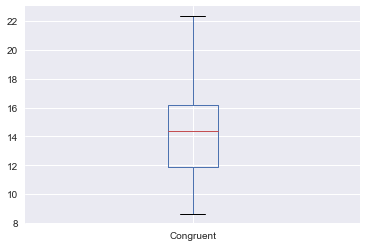

In [7]:
data.boxplot(column='Congruent')
plt.show()

### Histogram

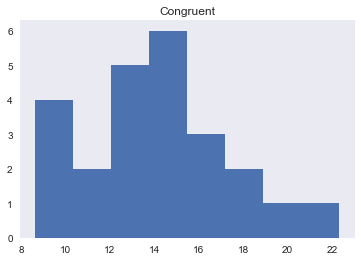

In [8]:
data.hist(column='Congruent', bins=8, grid=False)
plt.show()

## Analyse the Incongruent column

### Calculate point estimators

In [9]:
# Print the values of the variable
display(data['Incongruent'].head())

# Print the central tendency measure mean
print('Mean: ' + str(data['Incongruent'].mean()))

# Print the central tendency measure median
print('Median: ' + str(data['Incongruent'].median()))

# Print the variability measure varianz
print('Varianz: ' + str(data['Incongruent'].var()))

# Print the variability measure standard deviation
print('Standard Deviation: ' + str(data['Incongruent'].std()))

0    19.278
1    18.741
2    21.214
3    15.687
4    22.803
Name: Incongruent, dtype: float64

Mean: 22.01591666666667
Median: 21.0175
Varianz: 23.01175703623189
Standard Deviation: 4.7970571224691385


### Visualize the distribuition of the Incongruent column

### Boxplot

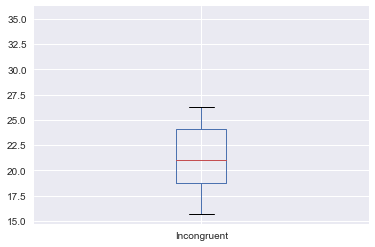

In [10]:
data.boxplot(column='Incongruent')
plt.show()

### Histogram

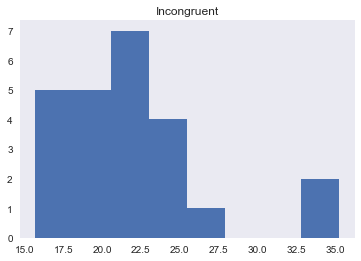

In [11]:
data.hist(column='Incongruent', bins=8, grid=False)
plt.show()

### Results of analysis

The plots show that the data of the congruent words condition is normal distributed with a mean of 14.051 and also the the data of the incongruent words condition is normal distributed with a mean of 22.016, but contains some extreme outliers to the top.

# Statistical test

## Decide for an statistical test

We test for the difference of the two samples. As the Stroop task results in n paried data. So we use the a sample test.  
As the sample size is relativly small we can't assume that the sampling distribution of the mean will be approximately normally distributed irrespective of the shape of the population distribution. So we don't use a t-test, not a Z-Test.
As the the sample is used to produce diffference scores through repeated measurement, we use the t-Test for dependent means.

## Calculate the CV for alpha = 0.05

In [12]:
cirtical_value = stats.t.ppf(1-0.05, len(data)-1)
print('CV: ' +str(cirtical_value))

CV: 1.71387152775


## Calculate the 95% CI

In [13]:
cm = sms.CompareMeans(sms.DescrStatsW(data['Congruent']), sms.DescrStatsW(data['Incongruent']))
print('95% CI: ' + str(cm.tconfint_diff(usevar='unequal')))

95% CI: (-10.424698188163974, -5.5048851451693626)


## Run the t-test

In [14]:
statistic, pvalue = stats.ttest_rel(data['Congruent'],data['Incongruent'])
one_side_pvalue = pvalue/2
print('p-value: ' + str(one_side_pvalue))

p-value: 2.05150029286e-08


As the p-value is extremly small there is strong evidence against the null hypothesis that incongruent words condition do not effect the time needed to complete the task.
Therefore, we reject $H_0$